In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the dataset into python environment

In [2]:
data = pd.read_csv('/content/titanic_dataset .csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Basc informations

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Do all the necessary pre-processing steps

**Missing values**

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

AGE



In [8]:
data['Age'].median()

28.0

In [9]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
#Seperating male and female data
male_data = data[data['Sex'] == 'male']
female_data = data[data['Sex'] == 'female']


In [11]:
male_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [12]:
#Number of null values in age of male
male_data['Age'].isna().sum()

124

In [13]:
female_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
#Number of null values in age of male
female_data['Age'].isna().sum()

53

Text(0, 0.5, 'Frequency')

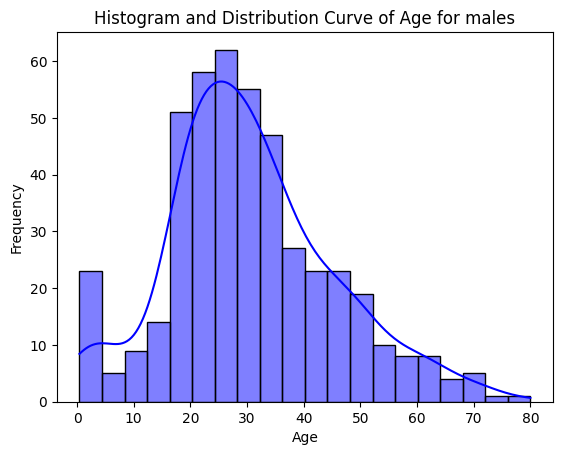

In [15]:
sns.histplot(male_data['Age'],kde=True, bins=20, color='blue')
plt.title('Histogram and Distribution Curve of Age for males')
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

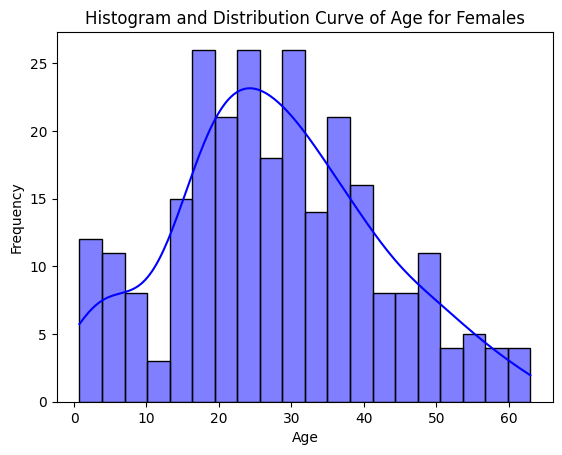

In [16]:
sns.histplot(female_data['Age'],kde=True, bins=20, color='blue')
plt.title('Histogram and Distribution Curve of Age for Females')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [17]:
male_data['Age'].median()

29.0

In [18]:
female_data['Age'].median()

27.0

Filling null values of age of male and female with their respectve median

In [19]:
data['Age'] = data.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))

In [20]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Cabin

In [21]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
cabin_missing = (687/891)*100
print('percentage of mssing values in cabin = ',cabin_missing)


percentage of mssing values in cabin =  77.10437710437711


In [23]:
# 77 % of values missing in cabin.therefore delete cabin

In [24]:
data.drop(columns = 'Cabin',inplace = True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Embarked

In [25]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [27]:
#Filling missing values of Embarked with mode
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [28]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**Outliers**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [30]:
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']

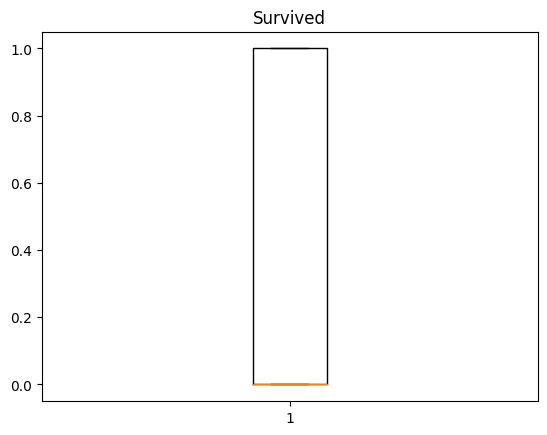

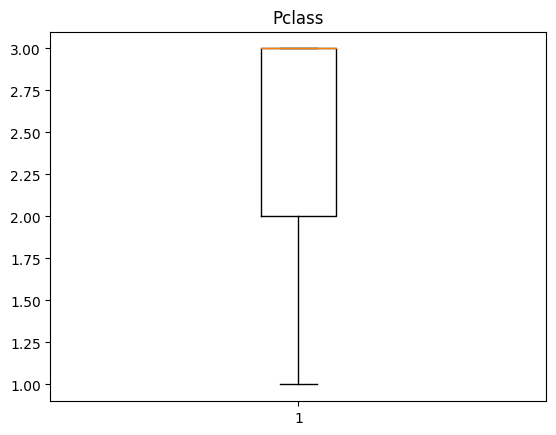

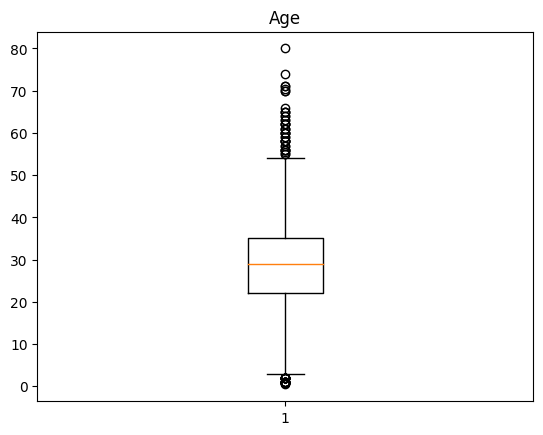

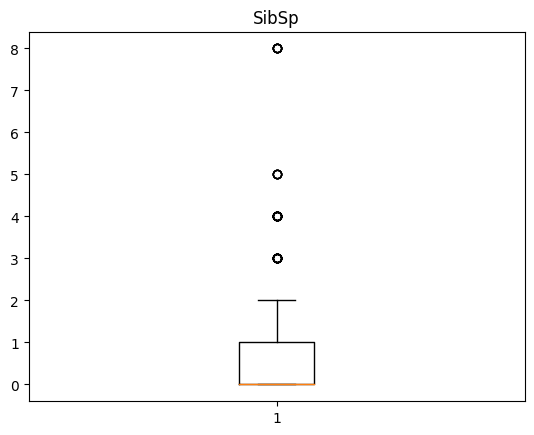

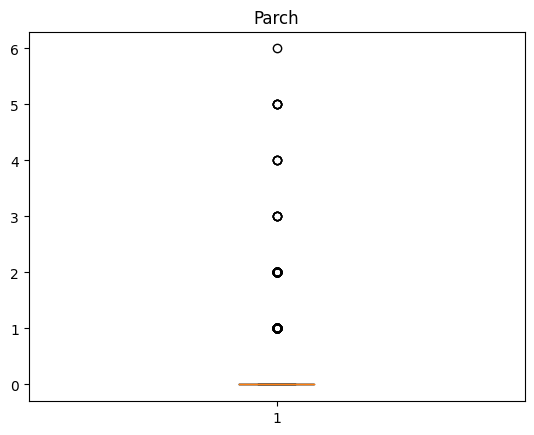

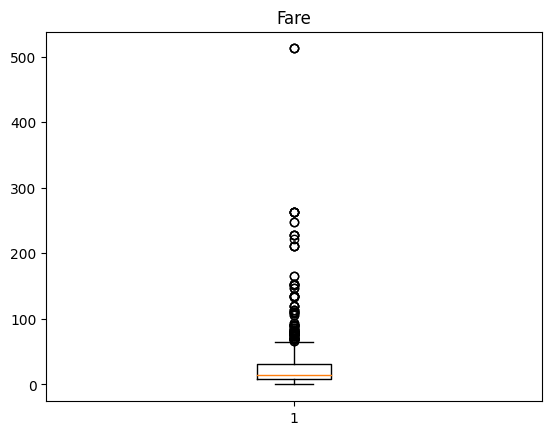

In [31]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

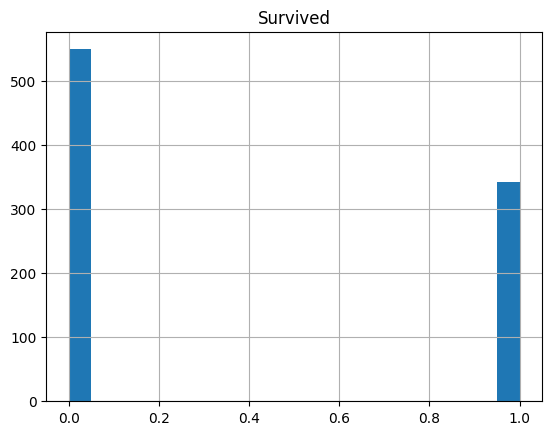

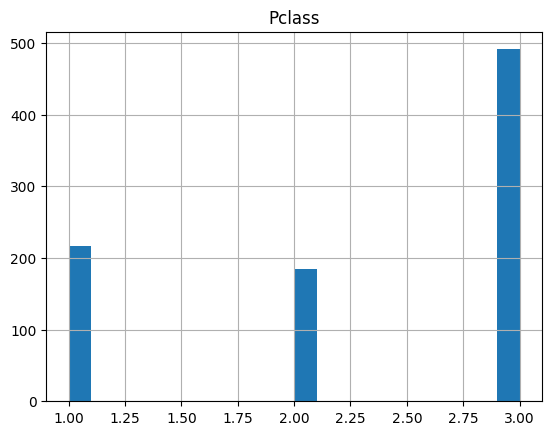

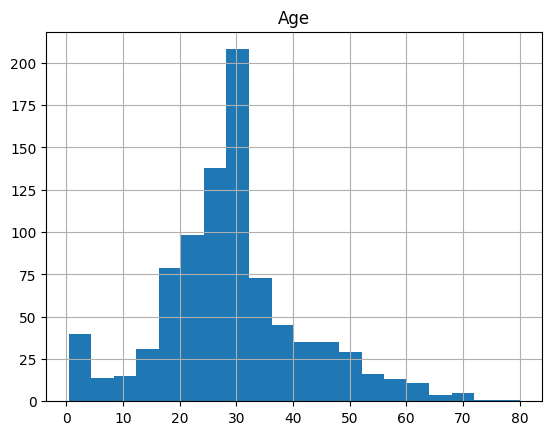

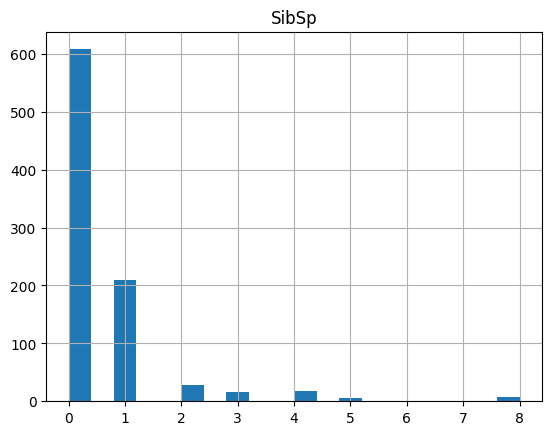

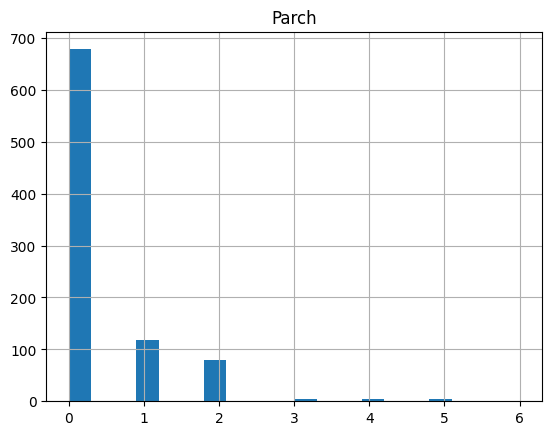

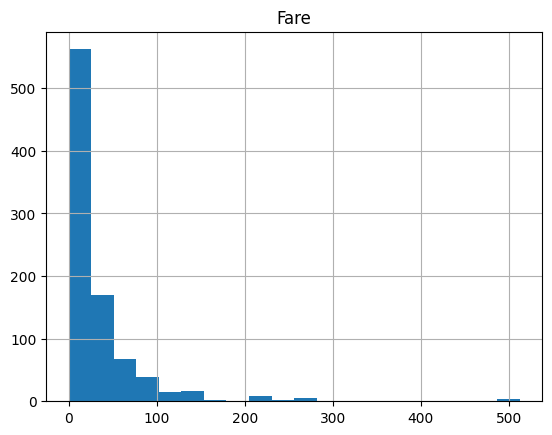

In [32]:
for i in num_cols:
  plt.figure()
  data[i].hist(bins=20)
  plt.title(i)

In [33]:
# Handling outliers in age and fare

**AGE**

In [34]:
age_q1 = data['Age'].quantile(0.25)
age_q3 = data['Age'].quantile(0.75)

In [35]:
print('Q1 is',age_q1)
print('Q3 is',age_q3)

Q1 is 22.0
Q3 is 35.0


In [36]:
age_IQR = age_q3-age_q1
print('IQR is',age_IQR)

IQR is 13.0


In [37]:
age_low_lim=age_q1-1.5*age_IQR
age_upp_lim=age_q3+1.5*age_IQR
print('Lower limit is',age_low_lim)
print('Upper limit is',age_upp_lim)

Lower limit is 2.5
Upper limit is 54.5


In [38]:
#Finding outliers
outlier=[]
for x in data['Age']:
  if((x>age_upp_lim) | (x<age_low_lim)):
    outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [39]:
#Capping outliers to upper limit and lower limit
data['Age'] = data['Age'].clip(lower=age_low_lim,upper=age_upp_lim)

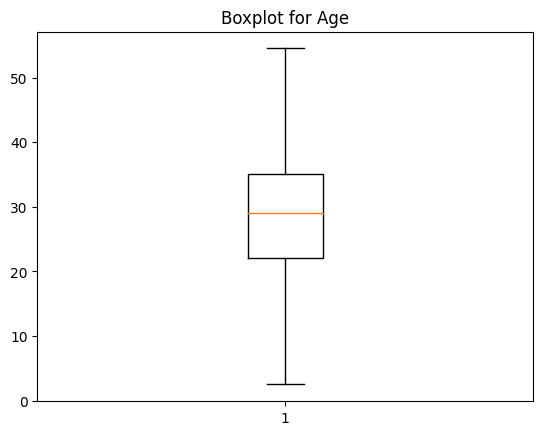

In [40]:
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()

<ipython-input-41-1c4203d5582e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

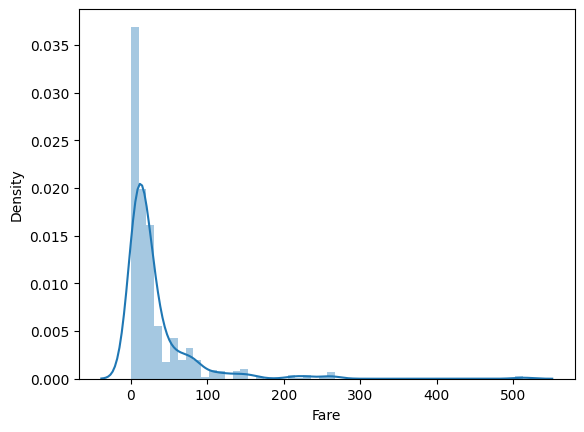

In [41]:
sns.distplot(data['Fare'])

In [42]:
data['Fare']=np.log(data['Fare']+1)

<ipython-input-43-1c4203d5582e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

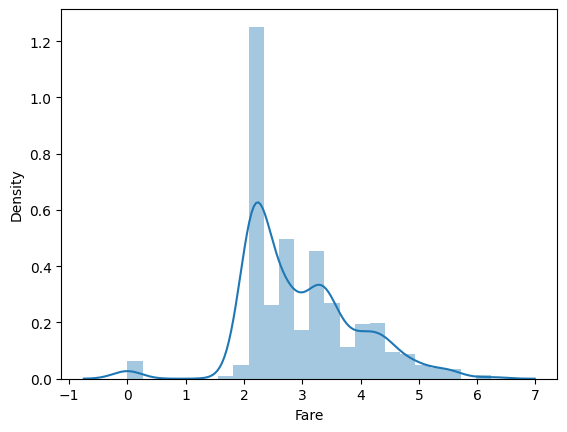

In [43]:
sns.distplot(data['Fare'])

Dropping unnecessary columns

In [44]:
data = data.drop(columns=['Name','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,2.110213,S
2,1,1,female,38.0,1,0,4.280593,C
3,1,3,female,26.0,0,0,2.188856,S
4,1,1,female,35.0,1,0,3.990834,S
5,0,3,male,35.0,0,0,2.202765,S


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [46]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [47]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

In [49]:
data['Sex'] = label_en.fit_transform(data['Sex'])
data['Embarked'] = label_en.fit_transform(data['Embarked'])

In [50]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,2.110213,2
2,1,1,0,38.0,1,0,4.280593,0
3,1,3,0,26.0,0,0,2.188856,2
4,1,1,0,35.0,1,0,3.990834,2
5,0,3,1,35.0,0,0,2.202765,2


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


<Axes: >

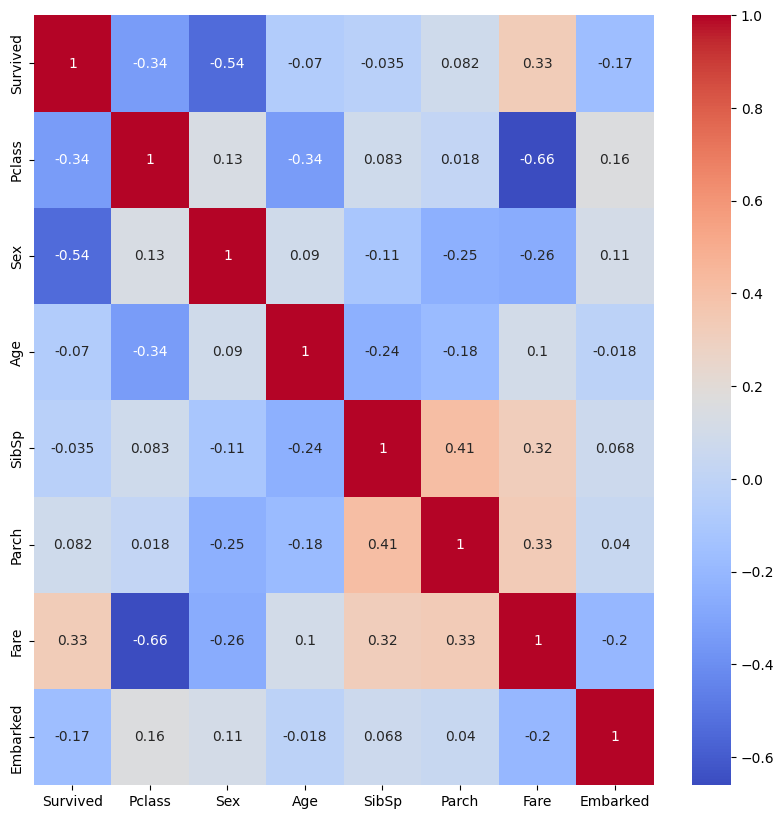

In [52]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [53]:
#spliting target variable as Classification(y) and other feaures(X)
y = data['Survived']
X = data.drop(['Survived'],axis=1)

In [54]:
#split the data to train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [55]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [56]:
from sklearn.metrics import confusion_matrix , accuracy_score

3. Create kNN and SVM models

**KNN** **CLASSIFIER**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.7486033519553073,
 0.7988826815642458,
 0.8100558659217877,
 0.7877094972067039,
 0.7932960893854749,
 0.7877094972067039,
 0.8268156424581006,
 0.8044692737430168,
 0.8100558659217877,
 0.7988826815642458,
 0.8212290502793296,
 0.8044692737430168,
 0.8268156424581006,
 0.8100558659217877]

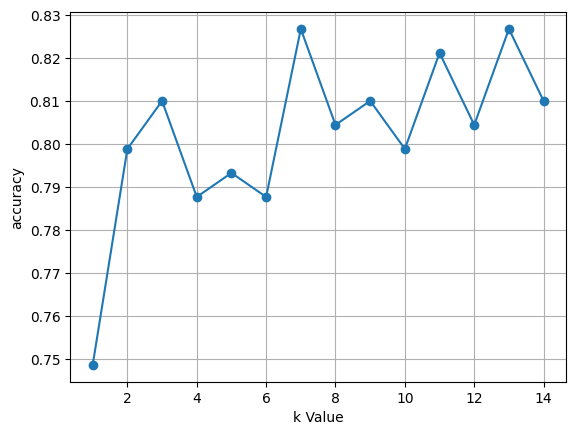

In [58]:
#plotting k vs accuracy to know which k gives maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [59]:
# maxmum accuracy at k=7

In [60]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)



In [61]:
#Confusion matrix for kNN
print('Confusion Matrix :\n ',confusion_matrix(y_test,y_pred_knn))

Confusion Matrix :
  [[93 12]
 [19 55]]


In [62]:
#Evaluation metrices
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))


KNN Accuracy is 0.8268156424581006


**Support** **Vector** **Machine**

In [63]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_pred_svm= svm_clf.predict(X_test)

In [64]:
#Confusion matrix for SVM
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_svm))

Confusion Matrix
 [[88 17]
 [22 52]]


In [65]:
#Evaluation metrices
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))


SVM Accuracy is 0.7821229050279329


4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

k-fold cross valdation

In [66]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores_knn = cross_val_score(knn, X_train, y_train, cv=kf)
print(kf_scores_knn)
print("K-Fold Cross-Validation Accuracy_knn:", kf_scores_knn.mean())

[0.79020979 0.79020979 0.78169014 0.83098592 0.83098592]
K-Fold Cross-Validation Accuracy_knn: 0.8048163104501134


In [67]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(SVC(), X_train, y_train, cv=kf)
print(kf_scores)
print("K-Fold Cross-Validation Accuracy_svc:", kf_scores.mean())

[0.83216783 0.8041958  0.78873239 0.84507042 0.86619718]
K-Fold Cross-Validation Accuracy_svc: 0.8272727272727274


stratified k-fold cross validation

In [68]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores_knn = cross_val_score(knn, X_train, y_train, cv=skf)
print(skf_scores_knn)
print("Stratified K-Fold Cross-Validation Accuracy_knn:", skf_scores_knn.mean())


[0.76923077 0.87412587 0.81690141 0.76056338 0.78873239]
Stratified K-Fold Cross-Validation Accuracy_knn: 0.8019107652910469


In [69]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores_svc = cross_val_score(SVC(), X_train, y_train, cv=skf)
print(skf_scores_svc)
print("Stratified K-Fold Cross-Validation Accuracy_svc:", skf_scores_svc.mean())


[0.7972028  0.87412587 0.85211268 0.79577465 0.82394366]
Stratified K-Fold Cross-Validation Accuracy_svc: 0.8286319314488327


In [70]:
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))
print("K-Fold Cross-Validation Accuracy for knn:", kf_scores_knn.mean())
print("K-Fold Cross-Validation Accuracy for svc:", kf_scores.mean())
print("Stratified K-Fold Cross-Validation Accuracy for knn:", skf_scores_knn.mean())
print("Stratified K-Fold Cross-Validation Accuracy for svc:", skf_scores_svc.mean())

KNN Accuracy is 0.8268156424581006
SVM Accuracy is 0.7821229050279329
K-Fold Cross-Validation Accuracy for knn: 0.8048163104501134
K-Fold Cross-Validation Accuracy for svc: 0.8272727272727274
Stratified K-Fold Cross-Validation Accuracy for knn: 0.8019107652910469
Stratified K-Fold Cross-Validation Accuracy for svc: 0.8286319314488327


We are getting accuracy of 82.86% for svm using stratified cross validation.
Therefore that is the better model.